In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import numpy as np

In [3]:
df = pd.read_html('https://www.proballers.com/basketball/league/3/nba/standings/2021')[0]

In [4]:
snip = df.iloc[:,[1,2,8,9,10]]
snip['% Victory'] = snip['% Victory'] / 100

C:\Users\pearceniklas\AppData\Local\Temp\ipykernel_21288\1554549804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snip['% Victory'] = snip['% Victory'] / 100


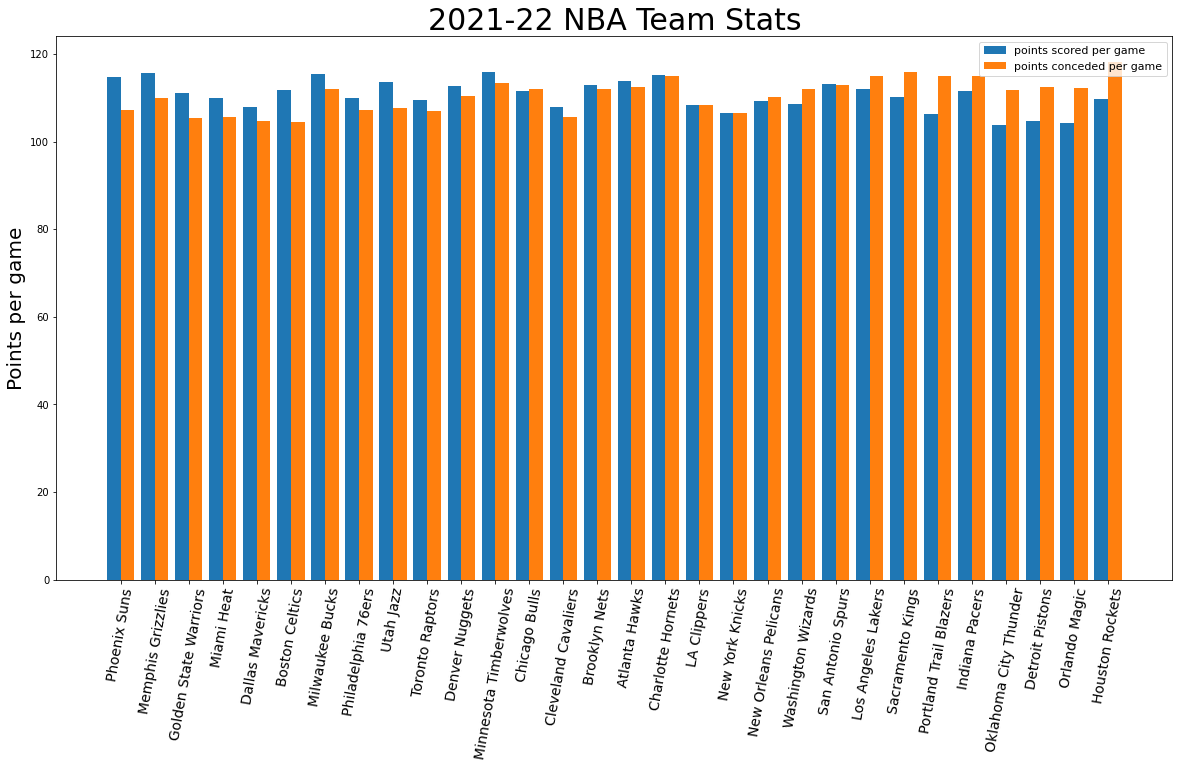

In [5]:
plt.figure(figsize=(20, 10))
X_axis = np.arange(len(snip['Team']))
plt.bar(X_axis - 0.2, snip['Pts+ /g'], 0.4)
plt.bar(X_axis + 0.2, snip['Pts- /g'], 0.4)
plt.title('2021-22 NBA Team Stats', fontsize = 30)
plt.xticks(X_axis, snip['Team'], fontsize=14, rotation = 80)
plt.ylabel('Points per game', fontsize = 20)
plt.legend(['points scored per game', 'points conceded per game'], fontsize = 11)

Text(111, 0.7, 'Correlation Coefficient: -0.68')

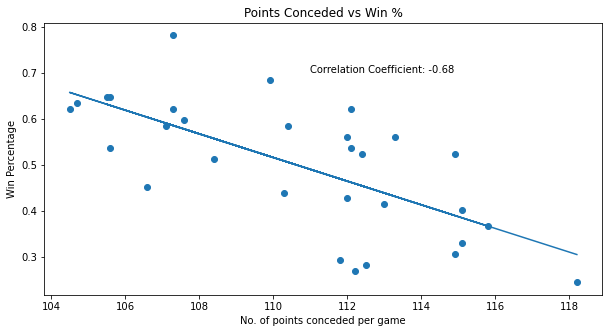

In [6]:
a1, b1 = np.polyfit(snip['Pts- /g'], snip['% Victory'], 1)
plt.figure(figsize=(10, 5))
plt.scatter(snip['Pts- /g'], snip['% Victory'])
plt.plot(snip['Pts- /g'], a1 * snip['Pts- /g']+b1)
plt.title('Points Conceded vs Win %')
plt.xlabel('No. of points conceded per game')
plt.ylabel('Win Percentage')
coef1 = round(np.corrcoef(snip['Pts- /g'], snip['% Victory'])[0,1], 2)
plt.text(111,0.7, 'Correlation Coefficient: ' + str(coef1))

Text(105, 0.7, 'Correlation Coefficient: 0.59')

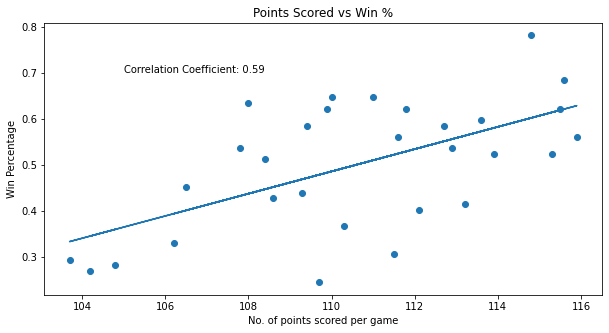

In [7]:
a2, b2 = np.polyfit(snip['Pts+ /g'], snip['% Victory'], 1)
plt.figure(figsize=(10, 5))
plt.scatter(snip['Pts+ /g'], snip['% Victory'])
plt.plot(snip['Pts+ /g'], a2 * snip['Pts+ /g']+b2)
plt.title('Points Scored vs Win %')
plt.xlabel('No. of points scored per game')
plt.ylabel('Win Percentage')
coef2 = round(np.corrcoef(snip['Pts+ /g'], snip['% Victory'])[0,1], 2)
plt.text(105,0.7, 'Correlation Coefficient: ' + str(coef2))

Text(-7, 0.7, 'Correlation Coefficient: 0.95')

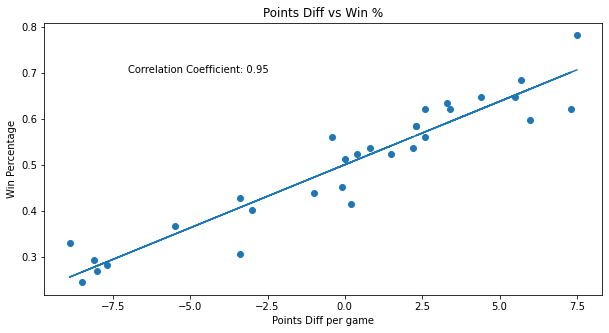

In [8]:
a3, b3 = np.polyfit(snip['Diff'], snip['% Victory'], 1)
plt.figure(figsize=(10, 5))
plt.scatter(snip['Diff'], snip['% Victory'])
plt.plot(snip['Diff'], a3 * snip['Diff']+b3)
plt.title('Points Diff vs Win %')
plt.xlabel('Points Diff per game')
plt.ylabel('Win Percentage')
coef3 = round(np.corrcoef(snip['Diff'], snip['% Victory'])[0,1], 2)
plt.text(-7,0.7, 'Correlation Coefficient: ' + str(coef3))